## Chargement des données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/drive")

pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

df_application_train = pd.read_csv("/content/drive/MyDrive/OC/P7/Data/application_train.csv")
df_application_test = pd.read_csv("/content/drive/MyDrive/OC/P7/Data/application_test.csv")





Mounted at /content/drive


In [ ]:
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,...,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,...,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,...,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Ty

In [ ]:
for df, name in zip(liste_df, liste) :
   print(name, df.shape)

application_train (307511, 122)
application_test (48744, 121)
bureau (1716428, 17)
bureau_balance (27299925, 3)
previous_application (1670214, 37)
POS_CASH_balance (10001358, 8)
installments_payments (13605401, 8)
credit_card_balance (3840312, 23)


In [ ]:
for df, name in zip(liste_df, liste) :
  print("Dataframe name :" + name)
  print("Part de NaN :", (df.isna().sum().sum()*100)/(df.shape[0]*df.shape[1]), '%')
  print(((df.isna().sum()/df.shape[0]) * 100),"\n")

Dataframe name :application_train
Part de NaN : 24.395941907129433 %
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64 

Dataframe name :application_test
Part de NaN : 23.811686761532336 %
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.

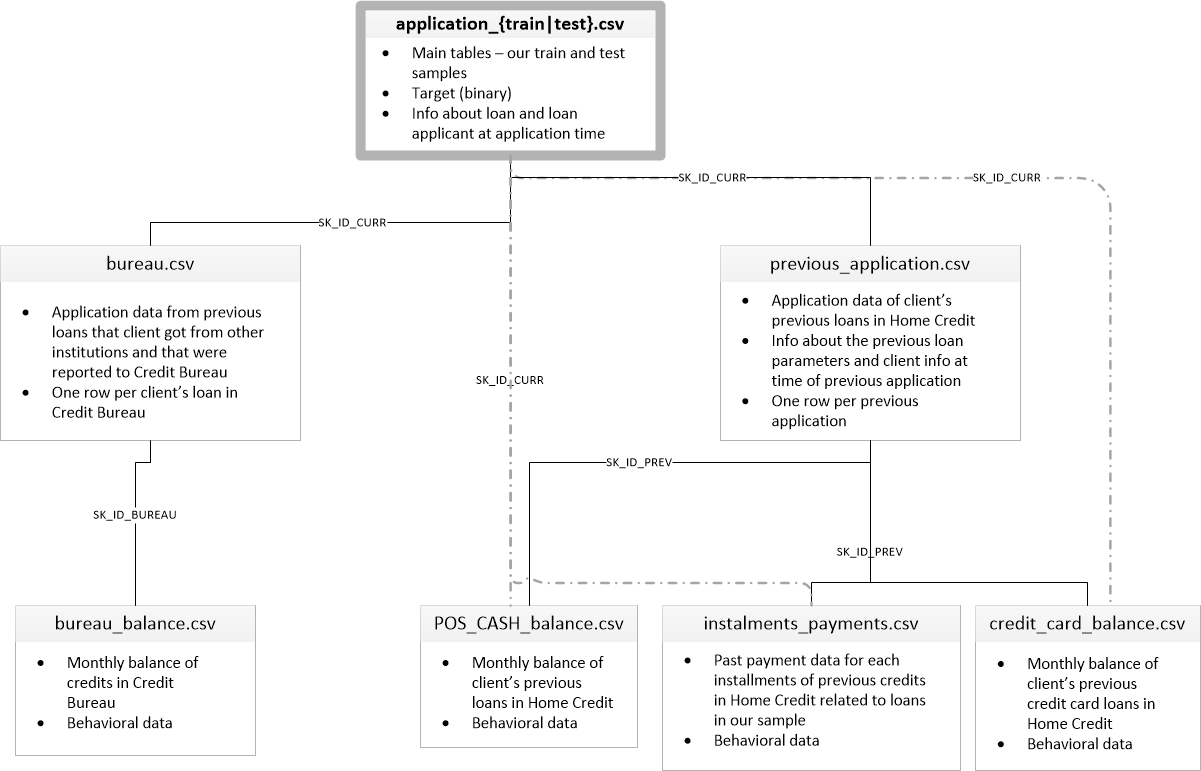

##Feature engineering

Code pris en parti sur le kaggle de Aguir [Kaggle](https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script )

Permet la simplification et la création de nouvelles variables comme 'DAYS_EMPLOYED_PERC' ou 'INCOME_CREDIT_PERC'.

Encode également les features quand nécéssaire

In [15]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = df_application_train
    test_df = df_application_test
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
        df[bin_feature] = df[bin_feature].astype('category')

    for cat_feature in ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
                       ] :
        df[cat_feature] = df[cat_feature].astype('category')

    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    df[cat_cols] = df[cat_cols].astype('category')
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    df.drop(columns= ['index'], inplace= True)
    df['TARGET'] = df['TARGET'].astype('category')

    for doc in range(2,22) :
        df['FLAG_DOCUMENT_{0}'.format(doc)] = df['FLAG_DOCUMENT_{0}'.format(doc)].astype('category')
    
    for cat_feature in [ 'FLAG_MOBIL', 'FLAG_EMP_PHONE',	'FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE',	'FLAG_PHONE',	'FLAG_EMAIL'] :
        df[cat_feature] = df[cat_feature].astype('category')

    del test_df
    gc.collect()
    return df



In [26]:
df = application_train_test()
df.head()

Train samples: 307511, test samples: 48744


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented fra

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,...,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0.070862,0.208736,135000.0,0.132217,0.027598
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011814,0.500000,67500.0,0.100000,0.050000
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
df.dtypes

TARGET                 category
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
CNT_CHILDREN              int64
                         ...   
DAYS_EMPLOYED_PERC      float64
INCOME_CREDIT_PERC      float64
INCOME_PER_PERSON       float64
ANNUITY_INCOME_PERC     float64
PAYMENT_RATE            float64
Length: 246, dtype: object

In [ ]:
limitPer = len(df) * .80
df.dropna(thresh=limitPer, axis=1, inplace=True)
df_train = df.loc[df['TARGET'].isna() == False]
df_test = df.loc[df['TARGET'].isna()]
df_train.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


##Analyse exploratoire

In [ ]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
count,201088.000000,2.010880e+05,2.010880e+05,201088.000000,2.010880e+05,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,201088.000000,2.010880e+05,201088.000000,201088.000000
mean,0.507395,1.791236e+05,6.224905e+05,27921.068261,5.591434e+05,0.020802,-14886.237229,-2477.791146,-4645.451733,-2867.873871,2.268808,2.045930,2.025526,12.241879,0.016078,0.059471,0.048069,0.085560,0.274586,0.215806,0.520425,0.500208,1.428847,0.140670,1.412009,0.097733,-1004.375164,0.162001,0.408588,9.481227e+04,0.174869,0.053169
std,0.767427,2.810363e+05,4.093669e+05,14468.032974,3.758034e+05,0.013723,3614.500842,2394.136554,3258.111846,1500.028781,0.941880,0.505923,0.500766,3.275914,0.125774,0.236506,0.213912,0.279713,0.446307,0.411381,0.187851,0.196010,2.426257,0.443419,2.404860,0.358847,834.032211,0.136343,0.579127,1.143716e+05,0.089610,0.022298
min,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000527,0.000000,0.000000,0.000000,0.000000,-4185.000000,-0.000000,0.030000,3.375000e+03,0.000224,0.024740
25%,0.000000,1.125000e+05,2.844000e+05,17244.000000,2.520000e+05,0.010006,-17632.000000,-3306.000000,-6964.000000,-4212.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.406891,0.357293,0.000000,0.000000,0.000000,0.000000,-1620.000000,0.058319,0.198626,4.950000e+04,0.111160,0.036122
50%,0.000000,1.575000e+05,5.324940e+05,26041.500000,4.545000e+05,0.018850,-14690.000000,-1725.000000,-4280.000000,-2984.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571304,0.520898,0.000000,0.000000,0.000000,0.000000,-818.000000,0.123701,0.312835,7.500000e+04,0.157976,0.050000
75%,1.000000,2.250000e+05,8.401590e+05,35694.000000,7.065000e+05,0.028663,-11954.000000,-807.000000,-1838.750000,-1589.000000,3.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.665557,0.657784,2.000000,0.000000,2.000000,0.000000,-305.000000,0.227163,0.500000,1.125000e+05,0.221400,0.061435
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,0.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.855000,0.893976,348.000000,34.000000,344.000000,24.000000,0.000000,0.728811,208.003328,3.900000e+07,1.451571,0.124430


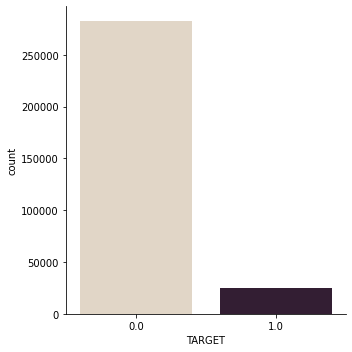

In [ ]:
sns.catplot(x="TARGET", kind="count", palette="ch:.25", data=df)


In [ ]:
df['TARGET'].value_counts()

0.0    282682
1.0     24825
Name: TARGET, dtype: int64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 7.4 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (72), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


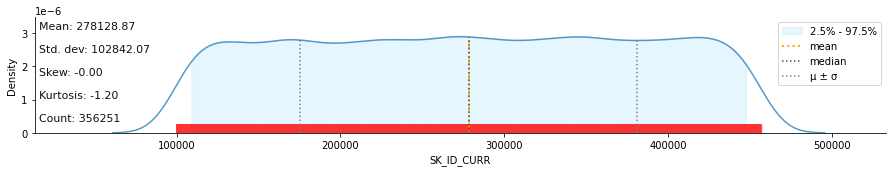

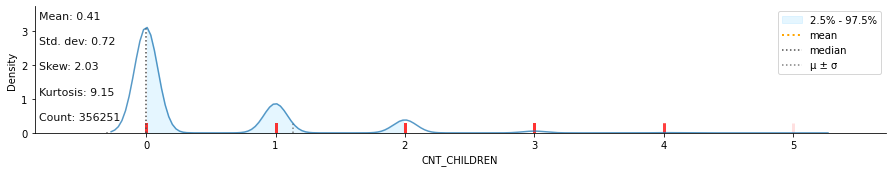

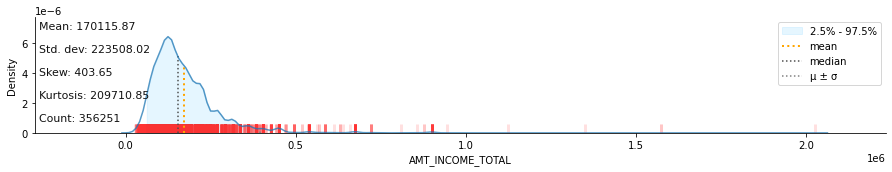

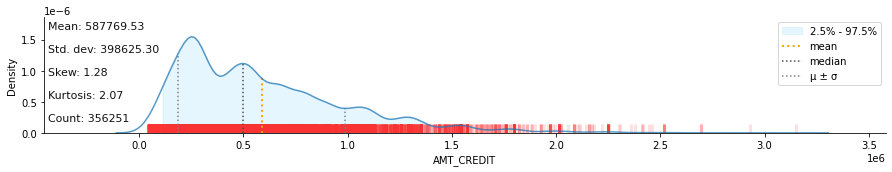

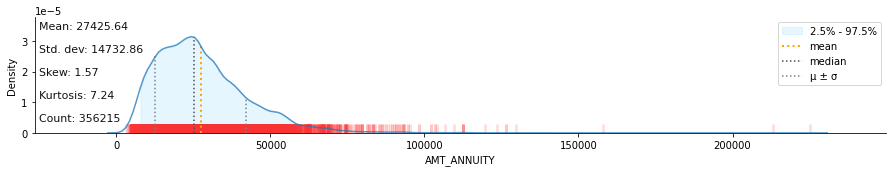

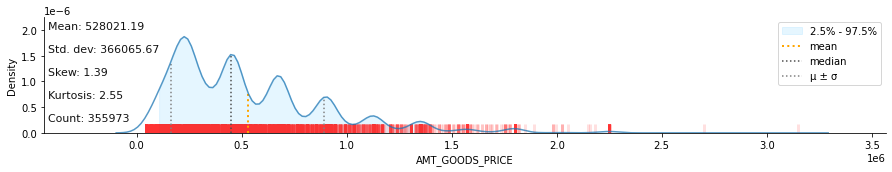

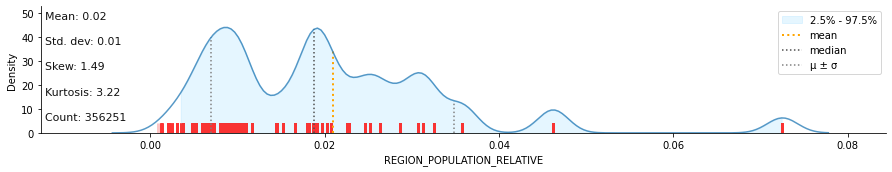

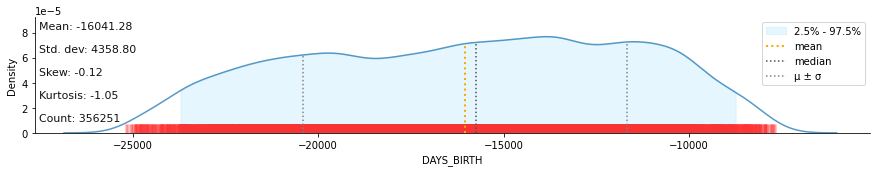

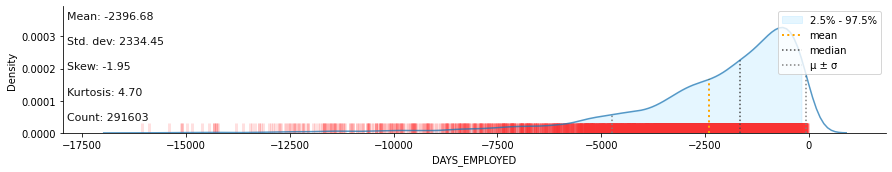

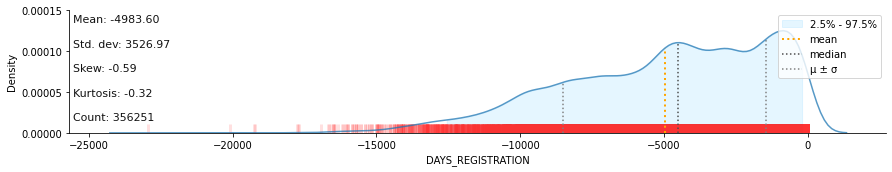

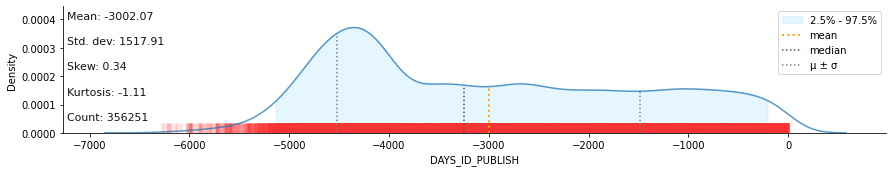

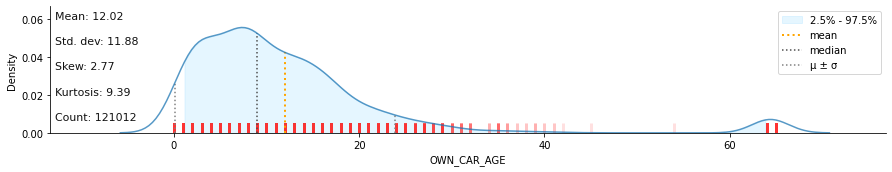

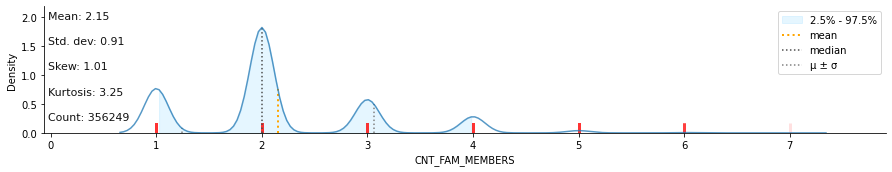

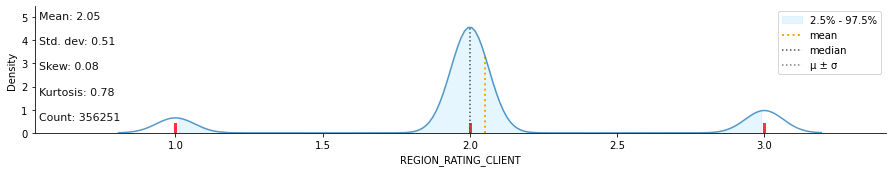

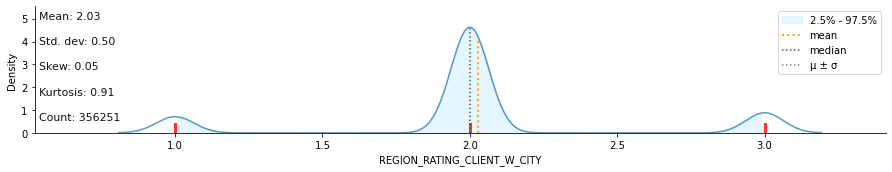

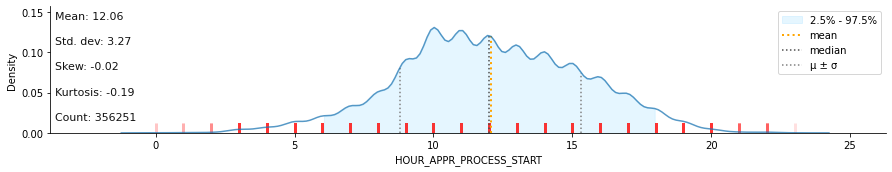

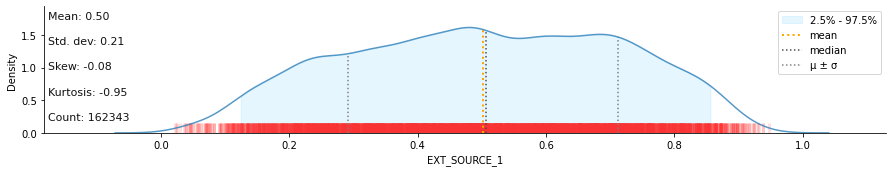

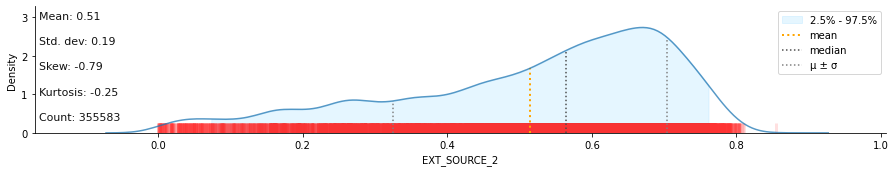

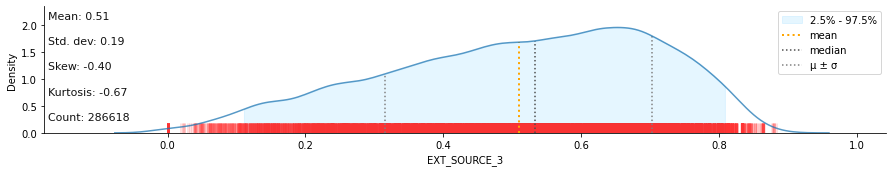

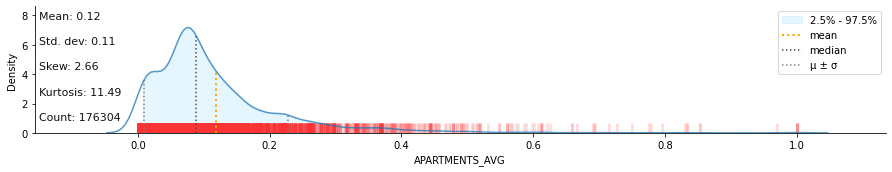

In [22]:
!pip install klib
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

import klib as kl

kl.dist_plot(df[numeric_cols])

In [20]:
from scipy.stats import f_oneway
numeric_cols = df_train.select_dtypes(include=['float64','int64']).columns

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
for num in numeric_cols :
# Finds out the Prices data for each FuelType as a list
  df_gb=df_train.groupby('TARGET')[num].apply(list)
  # Performing the ANOVA test
  # We accept the Assumption(H0) only when P-Value &gt; 0.05
  AnovaResults = f_oneway(*df_gb)
  print('P-Value for Anova is with column = {0}: '.format(num), AnovaResults[1])

P-Value for Anova is with column = CNT_CHILDREN:  0.003094019992433488
P-Value for Anova is with column = AMT_INCOME_TOTAL:  2.7193287436295943e-32
P-Value for Anova is with column = AMT_CREDIT:  2.2449254118301907e-46
P-Value for Anova is with column = AMT_ANNUITY:  1.4612385642094157e-08
P-Value for Anova is with column = AMT_GOODS_PRICE:  6.14333950748705e-77
P-Value for Anova is with column = REGION_POPULATION_RELATIVE:  2.965179855711369e-46
P-Value for Anova is with column = DAYS_BIRTH:  3.9164378839699156e-184
P-Value for Anova is with column = DAYS_EMPLOYED:  1.3286294414578505e-224
P-Value for Anova is with column = DAYS_REGISTRATION:  1.2491845112353635e-50
P-Value for Anova is with column = DAYS_ID_PUBLISH:  2.5832272005664146e-59
P-Value for Anova is with column = CNT_FAM_MEMBERS:  0.7901991594040398
P-Value for Anova is with column = REGION_RATING_CLIENT:  3.95731968116186e-134
P-Value for Anova is with column = REGION_RATING_CLIENT_W_CITY:  4.9132996570897716e-147
P-Value

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3349: RuntimeWarning:

invalid value encountered in double_scalars



P-Value for Anova is with column = REG_CITY_NOT_WORK_CITY:  8.064236614876021e-75
P-Value for Anova is with column = LIVE_CITY_NOT_WORK_CITY:  4.5342890800587585e-26
P-Value for Anova is with column = EXT_SOURCE_2:  0.0
P-Value for Anova is with column = EXT_SOURCE_3:  0.0
P-Value for Anova is with column = OBS_30_CNT_SOCIAL_CIRCLE:  2.662727384911357e-05
P-Value for Anova is with column = DEF_30_CNT_SOCIAL_CIRCLE:  2.0450584330185823e-28
P-Value for Anova is with column = OBS_60_CNT_SOCIAL_CIRCLE:  3.134988720707743e-05
P-Value for Anova is with column = DEF_60_CNT_SOCIAL_CIRCLE:  1.2656605261129424e-23
P-Value for Anova is with column = DAYS_LAST_PHONE_CHANGE:  9.483504364250513e-131
P-Value for Anova is with column = DAYS_EMPLOYED_PERC:  2.847082518916041e-184
P-Value for Anova is with column = INCOME_CREDIT_PERC:  1.5536336579006108e-06
P-Value for Anova is with column = INCOME_PER_PERSON:  2.926362752029587e-10
P-Value for Anova is with column = ANNUITY_INCOME_PERC:  1.32083014976

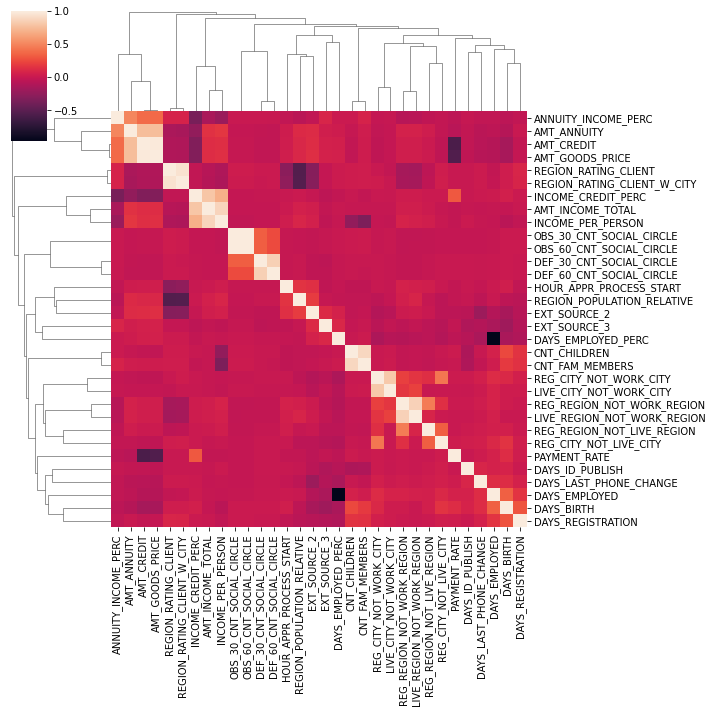

In [ ]:
sns.clustermap(df.corr())

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


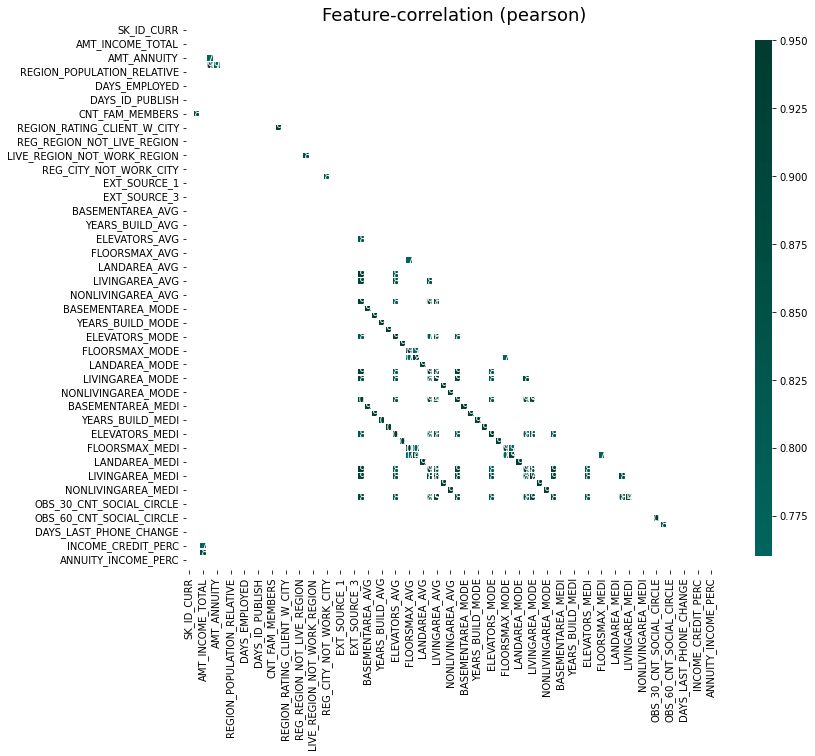

In [24]:
kl.corr_plot(df, split='pos',threshold = 0.7) # displaying only positive correlations, other settings include threshold, cmap...


Displaying negative correlations. Specify a negative "threshold" to limit the results further.


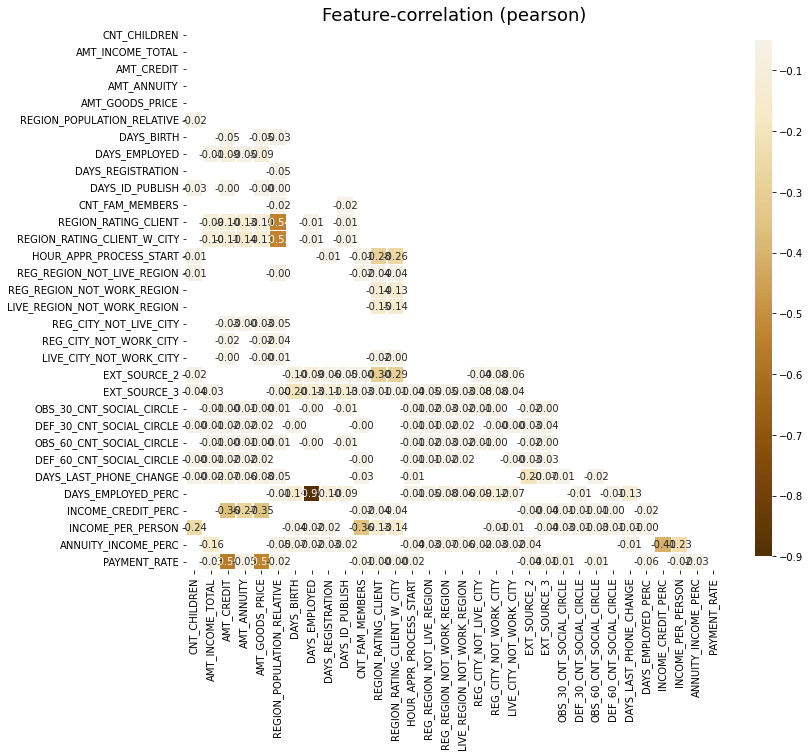

In [ ]:
kl.corr_plot(df, split='neg') # displaying only negative correlations

In [35]:
df_train = df.loc[df['TARGET'].isna() == False]
df_pred = df.loc[df['TARGET'].isna()]

df_train.drop(columns = ['SK_ID_CURR'], inplace= True)
dfgb = df.groupby('TARGET')

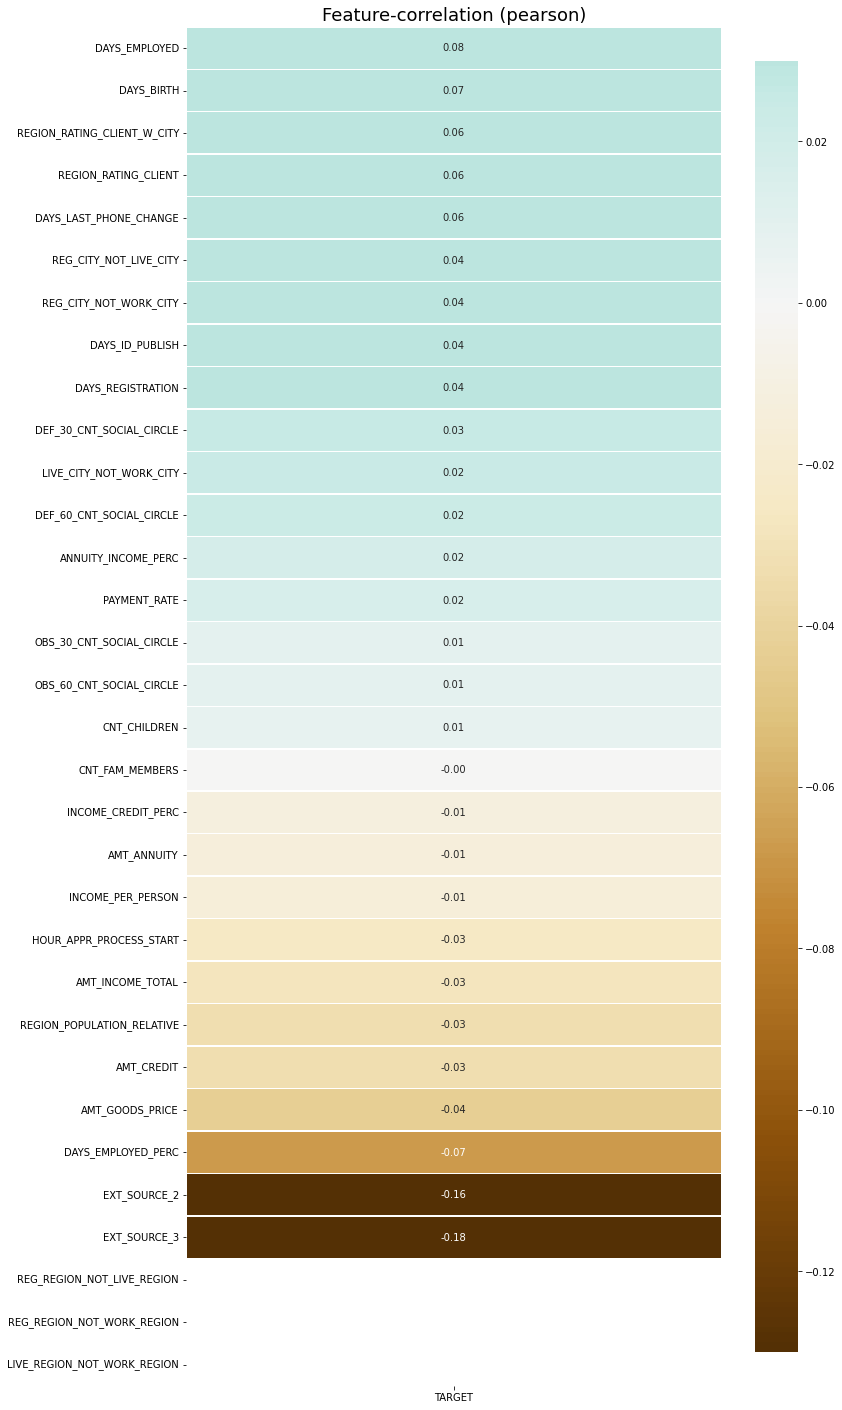

In [42]:
kl.corr_plot(df_train, target='TARGET',figsize =(12,25))

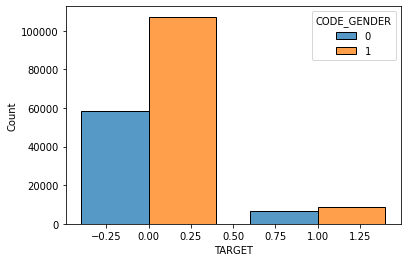

In [ ]:
sns.histplot(data=df_train, x="TARGET", hue="CODE_GENDER", multiple="dodge", shrink=.8)


Text(0.5, 6.79999999999999, 'YEARS_BIRTH')

<Figure size 1800x360 with 0 Axes>

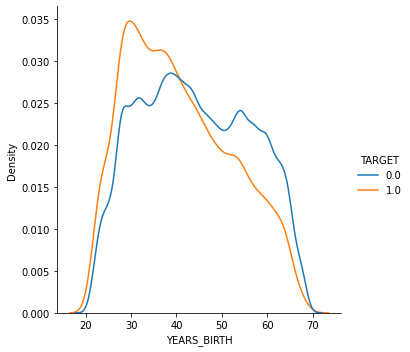

In [8]:
plt.figure(figsize=(25,5))
sns.displot(x=(-df_train['DAYS_BIRTH']/365),  data=df_train, hue = 'TARGET', common_norm=False, kind="kde")
plt.xlabel("YEARS_BIRTH")

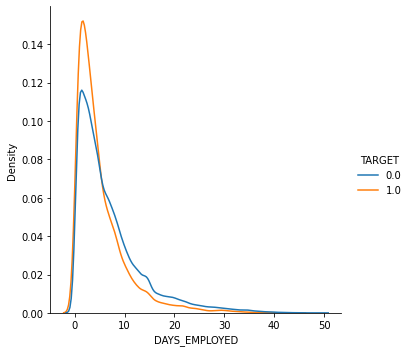

In [ ]:
sns.displot(x=(-df['DAYS_EMPLOYED']/365),  data=df_train, hue = 'TARGET', common_norm=False, kind="kde")

<Figure size 1800x360 with 0 Axes>

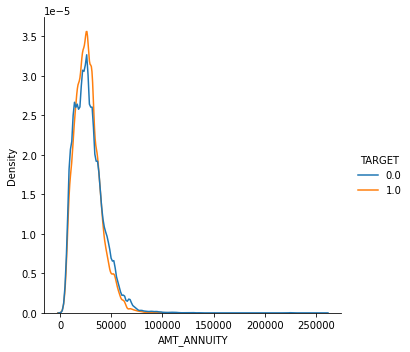

In [ ]:
plt.figure(figsize=(25,5))
sns.displot(x='AMT_ANNUITY',  data=df_train, hue = 'TARGET', kind="kde", common_norm=False)


<Figure size 1800x360 with 0 Axes>

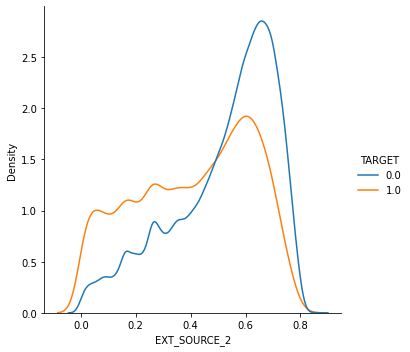

In [6]:
plt.figure(figsize=(25,5))
sns.displot(x='EXT_SOURCE_2',  data=df_train, hue = 'TARGET', kind="kde", common_norm=False)

<Figure size 1800x360 with 0 Axes>

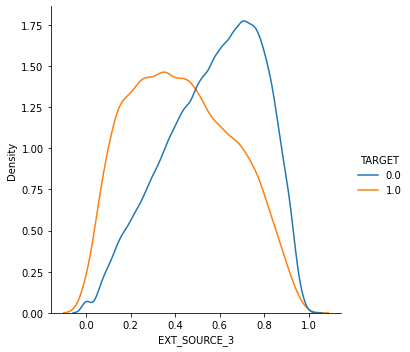

In [ ]:
plt.figure(figsize=(25,5))
sns.displot(x='EXT_SOURCE_3',  data=df_train, hue = 'TARGET', kind="kde", common_norm=False)


## Préparation pour ML

In [43]:
df_train = df.loc[df['TARGET'].isna() == False]
df_pred = df.loc[df['TARGET'].isna()]

df_train.drop(columns = ['SK_ID_CURR'], inplace= True)

In [44]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

def preprocessing(df) : 
  limitPer = len(df) * .80
  df.dropna(thresh=limitPer, axis=1, inplace=True)
  df.dropna(inplace=True)
  print(df.shape)
  numeric_cols = df.select_dtypes(include=['float64','int64']).columns
  mms = MinMaxScaler()
  mms = mms.fit(df[numeric_cols])
  df[numeric_cols] = mms.transform(df[numeric_cols])
  df[numeric_cols]=df[numeric_cols][df[numeric_cols].apply(zscore) < 4]
  df.dropna(inplace=True)
  df.reset_index(drop=True, inplace=True)
  return df, mms


In [45]:
df_train, mms = preprocessing(df_train)

(201088, 201)


In [ ]:
import joblib
joblib.dump(mms, '/content/drive/MyDrive/OC/P7/mms.gz')


['/content/drive/MyDrive/OC/P7/mms.gz']

In [ ]:
df_train.shape

(180800, 201)

In [ ]:
df_train.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,...,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0.0,0,1,0,0.000000,0.000350,0.022472,0.018630,0.023569,0.134897,0.351176,0.987439,0.814201,0.648326,1,1,1,1,1,0,0.000000,0.5,0.5,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.650189,0.815983,0.000000,0.0,0.000000,0.0,0.805257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016209,0.002260,0.001644,0.068747,0.253390
1,0.0,0,0,0,0.000000,0.000619,0.111235,0.099738,0.103255,0.491595,0.471297,0.911344,0.783234,0.933722,1,1,1,1,1,0,0.052632,0.5,0.5,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.414297,0.694723,0.000000,0.0,0.000000,0.0,0.394026,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.128616,0.000826,0.001183,0.191361,0.314594
2,0.0,1,1,0,0.052632,0.001235,0.378458,0.153570,0.337823,0.491595,0.651792,0.825257,0.947095,0.913992,1,1,0,1,1,0,0.105263,0.5,0.5,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.846784,0.550152,0.002874,0.0,0.002907,0.0,0.626762,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.311704,0.000383,0.001375,0.166261,0.017284
3,0.0,0,1,0,0.000000,0.002851,0.370787,0.156593,0.371493,0.039215,0.362360,0.974933,0.799503,0.669446,1,1,1,1,0,0,0.052632,1.0,1.0,0.695652,0.0,0.0,0.0,0.0,1.0,1.0,0.835414,0.604542,0.005747,0.0,0.005814,0.0,0.744325,0,1,0,0,0

In [ ]:
df_train.dtypes

TARGET                 category
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
CNT_CHILDREN            float64
                         ...   
DAYS_EMPLOYED_PERC      float64
INCOME_CREDIT_PERC      float64
INCOME_PER_PERSON       float64
ANNUITY_INCOME_PERC     float64
PAYMENT_RATE            float64
Length: 199, dtype: object

## Fonction coût métier

Plusieurs métriques sont à notre disposition pour mesure l'efficacité de nos modèles. Cependant compte tenu de la spécialité de notre problème nous ne pouvons pas simplement prendre l'accuracy ou la precision. 
En effet, d'une part nous avons un jeu de données non equilibré et d'autre part une personne qui ne rembourse pas son prêt (False Negative) coûte environ 10 fois plus cher à la banque qu'une personne qui aurait pu prendre un crédit mais que l'on a refusé (False Positive).  

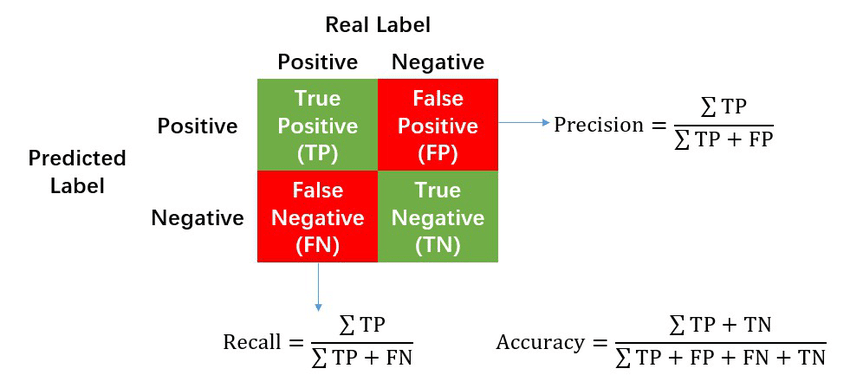




Pour prendre en compte cette dernière spécificité nous allons alors utilisé la fonction F1 beta dont la formule est ci-dessous. Nous décidons d'appliquer cette solution avec beta = 3 car nous voulons que les False Negative pèse environ 10 fois plus que les False Positive.


















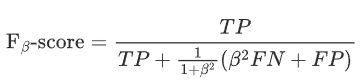

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV


fb = make_scorer(fbeta_score, beta=3) 



## DummyClassifier

Nous décidons de créer une baseline à partir de DummyClassifier pour comparer l'efficacité de nos modèles. Etant donné que nos données ne sont pas équilibrées on a une accuracy qui est tout de même à 0.92 mais notre fonction beta est quant à elle à 0.

Accuracy model score DummyClassifier()  : 0.9172345132743362
Accuracy model score DummyClassifier()  : 0.0


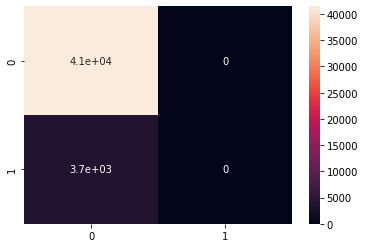

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']], stratify=df_train[['TARGET']])

model_baseline =  DummyClassifier()
model_baseline.fit(X_train,y_train)
y_predict = model_baseline.predict(X_test)

print("Accuracy model score {0}  : {1}".format(model_baseline,metrics.accuracy_score(y_test, y_predict)))
print("Accuracy model score {0}  : {1}".format(model_baseline,metrics.fbeta_score(y_test, y_predict, beta = 3)))
plt.figure()
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.show()


## Tests modèles

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy model score LogisticRegression(class_weight=' unbalanced')  : 0.0


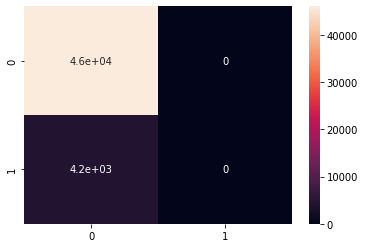

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy model score GaussianNB()  : 0.015043054258740536


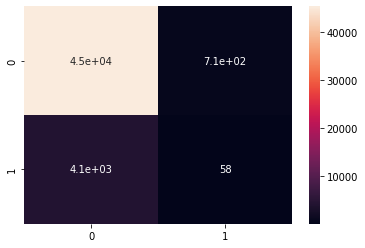

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy model score KNeighborsClassifier()  : 0.01466122107026914


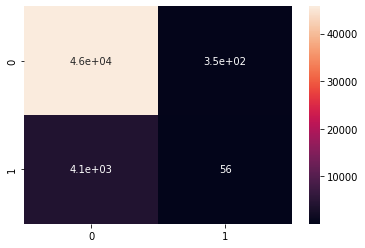

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']], stratify=df_train[['TARGET']])

models=[LogisticRegression(class_weight =' unbalanced'), GaussianNB(), KNeighborsClassifier()]

for model in models :
  model.fit(X_train,np.array(y_train))
  y_predict = model.predict(X_test)
  print("Accuracy model score {0}  : {1}".format(model,metrics.fbeta_score(y_test, y_predict, beta = 3)))
  plt.figure()
  cm = confusion_matrix(y_test, y_predict)
  sns.heatmap(cm, annot=True)
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy model score LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=10000, nthread=4, num_leaves=34,
               reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
               subsample=0.8715623, verbose=-1)  : 0.04387489139878367


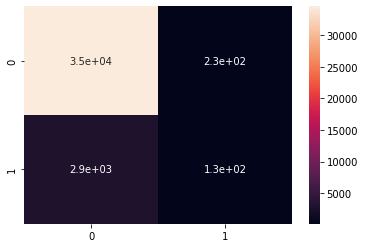

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier( nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1)

clf.fit(X_train,y_train, eval_metric= 'auc')
y_predict = clf.predict(X_test)
print("Accuracy model score {0}  : {1}".format(clf,metrics.fbeta_score(y_test, y_predict, beta = 3)))
plt.figure()
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.show()


##Fonction plot RUC

In [ ]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual values')
    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


##Over-sampling

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 



X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']], stratify=df_train[['TARGET']])

X = pd.concat([X_train, y_train], axis=1)
class_count_0, class_count_1 = X['TARGET'].value_counts()
class_0 = X[X['TARGET'] == 0]
class_1 = X[X['TARGET'] == 1]

class_1_over = class_1.sample(class_count_0, replace=True)
X = pd.concat([class_1_over, class_0], axis=0)

X_train, y_train = X.loc[:, X.columns != 'TARGET'], X[['TARGET']]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


F1Score model  LogisticRegression()  : 0.5190861475125848


<Figure size 432x288 with 0 Axes>

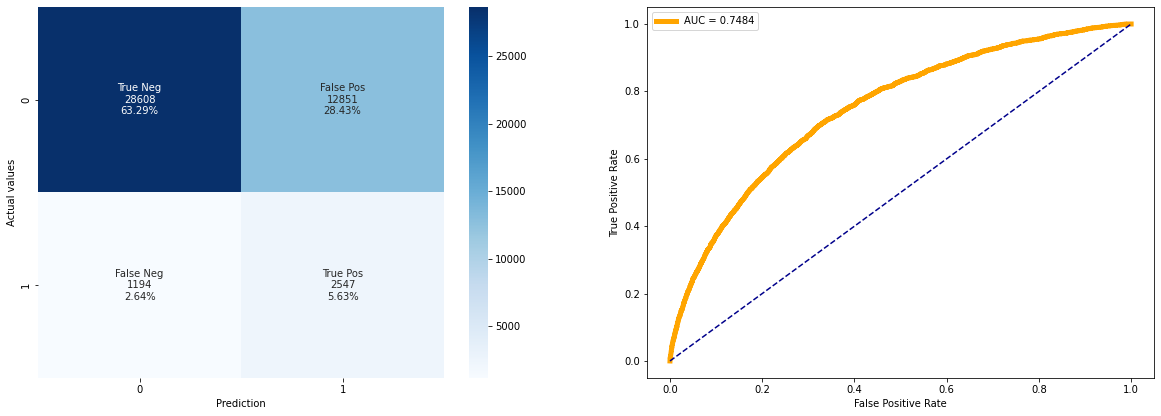

F1Score model  AdaBoostClassifier()  : 0.5172942788766389


<Figure size 432x288 with 0 Axes>

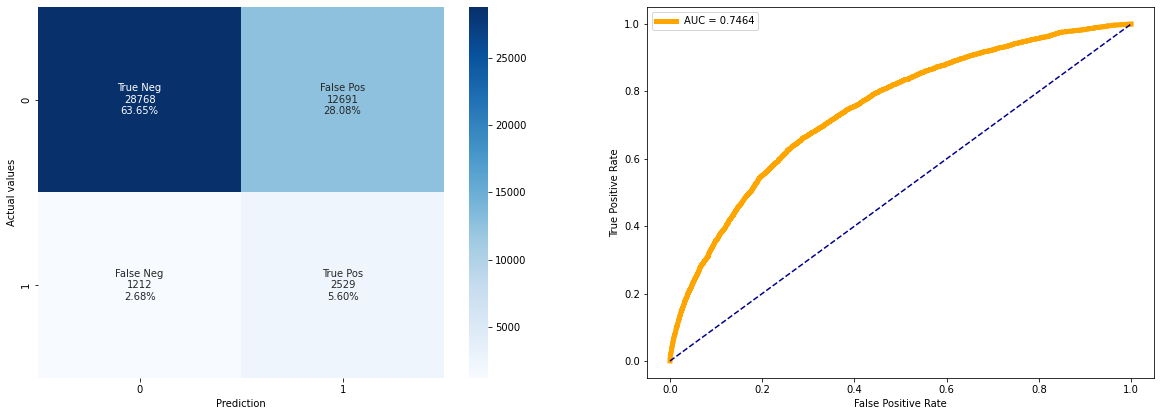

F1Score model  RandomForestClassifier()  : 0.016576875259013676


<Figure size 432x288 with 0 Axes>

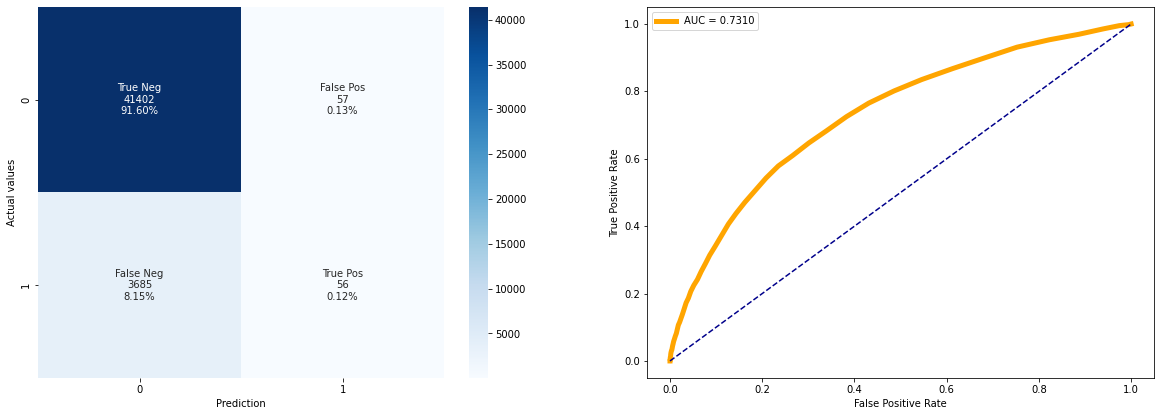

F1Score model  GradientBoostingClassifier()  : 0.5235666694085712


<Figure size 432x288 with 0 Axes>

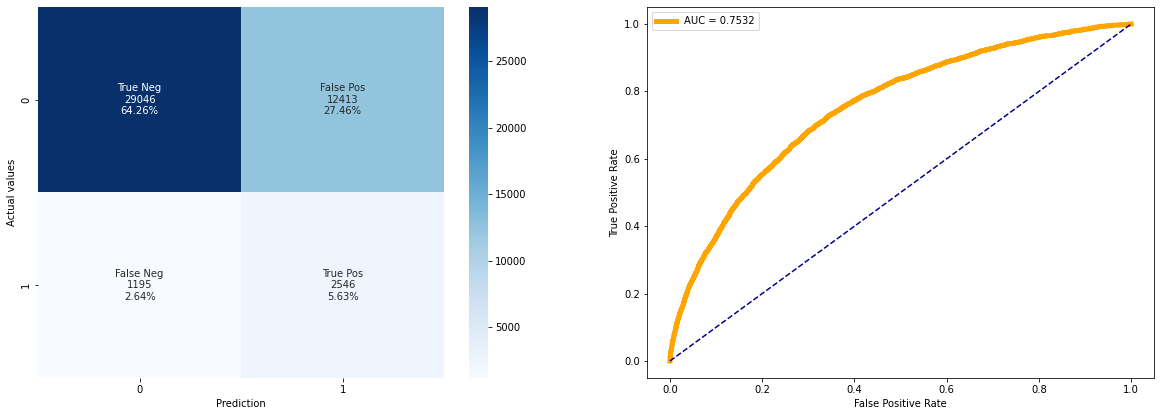

F1Score model  DecisionTreeClassifier()  : 0.17104637022154076


<Figure size 432x288 with 0 Axes>

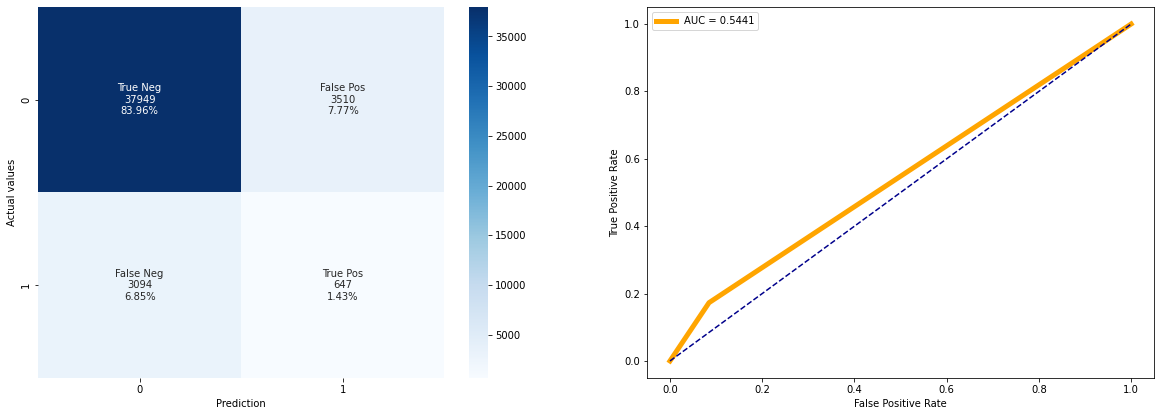

F1Score model  LGBMClassifier()  : 0.5176070386157948


<Figure size 432x288 with 0 Axes>

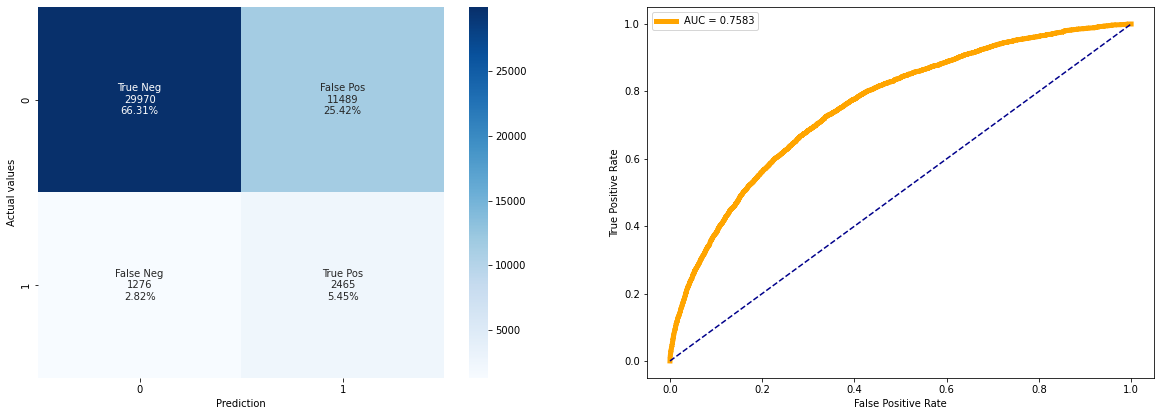

In [ ]:


models=[LogisticRegression(),AdaBoostClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(),LGBMClassifier()]

for model in models :
  model.fit(X_train,y_train.values.ravel())
  y_predict = model.predict(X_test)
  print("F1Score model  {0}  : {1}".format(model,metrics.fbeta_score(y_test, y_predict, beta = 3)))
  plt.figure()
  roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
  cf_matrix_roc_auc(model, y_test, model.predict(X_test), model.predict_proba(X_test)[:,1])

## SMOTE 

0.0    10312
1.0      938
Name: TARGET, dtype: int64
Avant transformation avec SMOTENC : 10312 938
(20624, 200) (11250, 200)
Après transformation avec SMOTENC : 10312 10312


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy model score LogisticRegression()  : 0.1295774647887324


<Figure size 432x288 with 0 Axes>

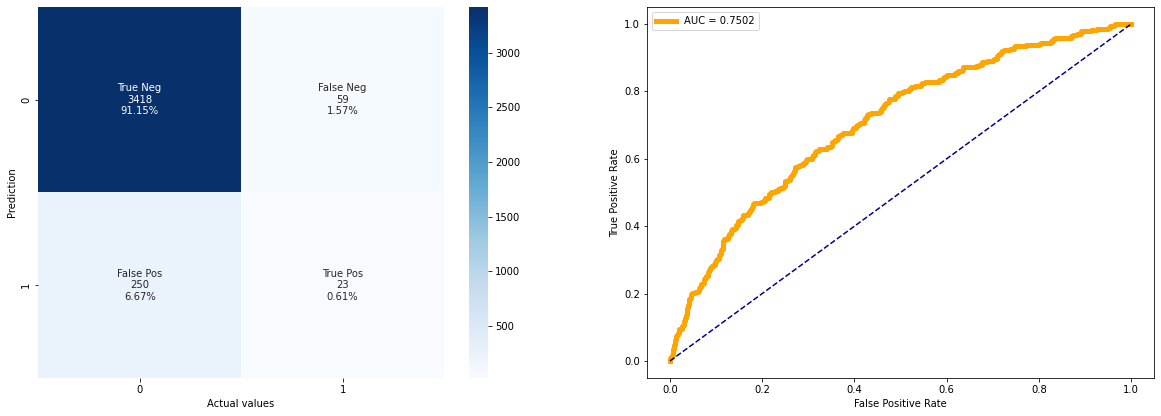

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTENC


X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'].head(15000), df_train[['TARGET']].head(15000))

print(y_train['TARGET'].value_counts())
class_count_0, class_count_1 = y_train['TARGET'].value_counts()
print('Avant transformation avec SMOTENC :', class_count_0,class_count_1) 

smote = SMOTENC(categorical_features= np.array(df_train.dtypes == 'category'))

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print(x_smote.shape,X_train.shape)


X_train, y_train = x_smote, y_smote

class_count_0, class_count_1 = y_train['TARGET'].value_counts()
print('Après transformation avec SMOTENC :', class_count_0,class_count_1) 

models=[LogisticRegression()]

for model in models :
  model.fit(X_train,np.array(y_train))
  y_predict = model.predict(X_test)
  print("Accuracy model score {0}  : {1}".format(model,metrics.f1_score(y_test, y_predict)))
  plt.figure()
  cf_matrix_roc_auc(model, y_test, model.predict(X_test), model.predict_proba(X_test)[:,1])

## Under-sampling

In [46]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier


X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']])

X = pd.concat([X_train, y_train], axis=1)
class_count_0, class_count_1 = X['TARGET'].value_counts()
class_0 = X[X['TARGET'] == 0]
class_1 = X[X['TARGET'] == 1]

class_0_under = class_0.sample(class_count_1)
X = pd.concat([class_1, class_0_under], axis=0)
print('under_sampling :', X['TARGET'].value_counts()) 

X_train, y_train = X.loc[:, X.columns != 'TARGET'], X[['TARGET']]

under_sampling : 0.0    11196
1.0    11196
Name: TARGET, dtype: int64


### Test différents modèles

In [ ]:

models=[LogisticRegression(),AdaBoostClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(),LGBMClassifier()]

for model in models :
  model.fit(X_train,np.array(y_train))
  y_predict = model.predict(X_test)
  print("F1 betascore model {0}  : {1}".format(model,metrics.fbeta_score(y_test, y_predict, beta = 3)))



F1 betascore model LogisticRegression()  : 0.5248618784530387
F1 betascore model AdaBoostClassifier()  : 0.462707182320442
F1 betascore model RandomForestClassifier()  : 0.49824561403508777
F1 betascore model GradientBoostingClassifier()  : 0.5044920525224602
F1 betascore model DecisionTreeClassifier()  : 0.42370076133730555
F1 betascore model LGBMClassifier()  : 0.5284831846259438


### Under-sampling GS LogisticRegression



under_sampling : 0.0    11292
1.0    11292
Name: TARGET, dtype: int64
(22584, 143)
0.5092334674507377


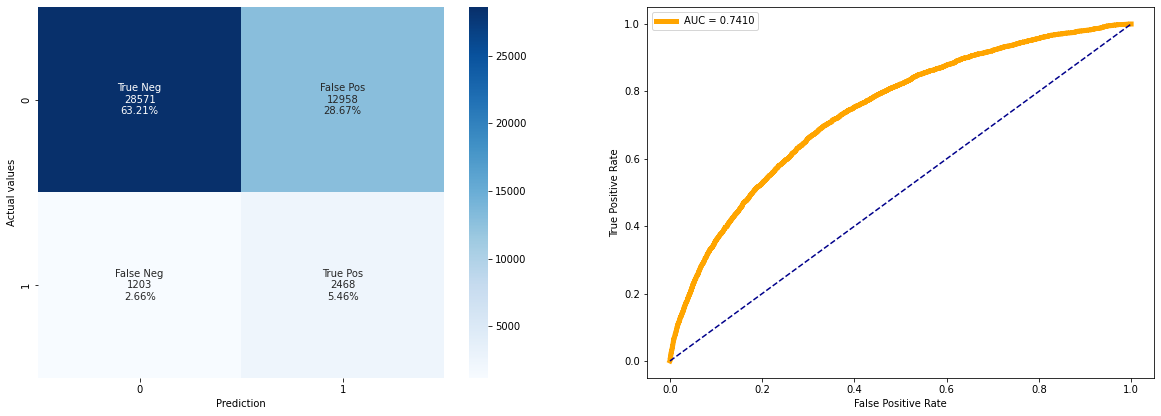

{'cv': 3, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'importance_getter': 'auto', 'min_features_to_select': 1, 'n_jobs': None, 'scoring': make_scorer(fbeta_score, beta=3), 'step': 1, 'verbose': 0}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, make_scorer,auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
warnings.simplefilter(action='ignore', category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']])

X = pd.concat([X_train, y_train], axis=1)
class_count_0, class_count_1 = X['TARGET'].value_counts()
class_0 = X[X['TARGET'] == 0]
class_1 = X[X['TARGET'] == 1]

class_0_under = class_0.sample(class_count_1)
X = pd.concat([class_1, class_0_under], axis=0)
print('under_sampling :', X['TARGET'].value_counts()) 

X_train, y_train = X.loc[:, X.columns != 'TARGET'], X[['TARGET']]

fb = make_scorer(fbeta_score, beta=3) 

parameters = {'C':np.logspace(-3,4,15),'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression()
selector = RFECV(model, step=1, cv=3, scoring=fb)
selector = selector.fit(X_train, np.array(y_train))
print(selector.transform(X_train).shape)
clf = GridSearchCV(model, parameters, cv=3, scoring=fb)
clf.fit(selector.transform(X_train), np.array(y_train))
GSmodel = clf.best_estimator_
y_predict = GSmodel.predict(selector.transform(X_test))
print(metrics.fbeta_score(y_test, y_predict, beta = 3))
roc_auc = roc_auc_score(y_test, GSmodel.predict_proba(selector.transform(X_test))[:,1])
cf_matrix_roc_auc(GSmodel, y_test,  y_predict, GSmodel.predict_proba(selector.transform(X_test))[:,1])
print(selector.get_params())

### Under-sampling GS LGBMClassifier 

under_sampling : 0.0    11255
1.0    11255
Name: TARGET, dtype: int64
(22510, 98)
Optimal number of features: 98
0.5215199289212141


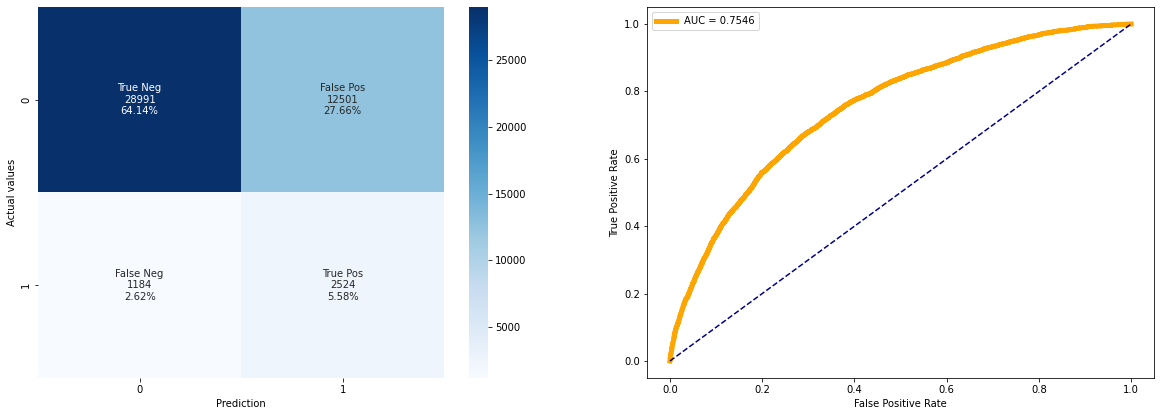

{'cv': 3, 'estimator__boosting_type': 'gbdt', 'estimator__class_weight': None, 'estimator__colsample_bytree': 1.0, 'estimator__importance_type': 'split', 'estimator__learning_rate': 0.1, 'estimator__max_depth': -1, 'estimator__min_child_samples': 20, 'estimator__min_child_weight': 0.001, 'estimator__min_split_gain': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': -1, 'estimator__num_leaves': 31, 'estimator__objective': None, 'estimator__random_state': None, 'estimator__reg_alpha': 0.0, 'estimator__reg_lambda': 0.0, 'estimator__silent': True, 'estimator__subsample': 1.0, 'estimator__subsample_for_bin': 200000, 'estimator__subsample_freq': 0, 'estimator': LGBMClassifier(), 'importance_getter': 'auto', 'min_features_to_select': 1, 'n_jobs': None, 'scoring': make_scorer(fbeta_score, beta=3), 'step': 1, 'verbose': 0}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import warnings
from sklearn import metrics
warnings.simplefilter(action='ignore', category=FutureWarning)


X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']])

X = pd.concat([X_train, y_train], axis=1)
class_count_0, class_count_1 = X['TARGET'].value_counts()
class_0 = X[X['TARGET'] == 0]
class_1 = X[X['TARGET'] == 1]

class_0_under = class_0.sample(class_count_1)
X = pd.concat([class_1, class_0_under], axis=0)
print('under_sampling :', X['TARGET'].value_counts()) 

X_train, y_train = X.loc[:, X.columns != 'TARGET'], X[['TARGET']]

parameters = {"min_data_in_leaf" : np.arange(20,120,10), "learning_rate" :  np.arange(0.01,0.10,0.01)}

model = LGBMClassifier()
selector = RFECV(model, step=1, cv=3, scoring=fb)
selector = selector.fit(X_train, y_train.values.ravel())
print(selector.transform(X_train).shape)
print('Optimal number of features: {}'.format(selector.n_features_))
clf = GridSearchCV(model, parameters, cv=3, scoring=fb)
clf.fit(selector.transform(X_train), y_train.values.ravel())
GSmodel = clf.best_estimator_
y_predict = GSmodel.predict(selector.transform(X_test))
print(metrics.fbeta_score(y_test, y_predict, beta = 3))
roc_auc = roc_auc_score(y_test, GSmodel.predict_proba(selector.transform(X_test))[:,1])
cf_matrix_roc_auc(GSmodel, y_test,  y_predict, GSmodel.predict_proba(selector.transform(X_test))[:,1])
print(selector.get_params())

In [ ]:
clf.best_estimator_

LGBMClassifier(min_data_in_leaf=90)

(22510, 64)
Optimal number of features: 64


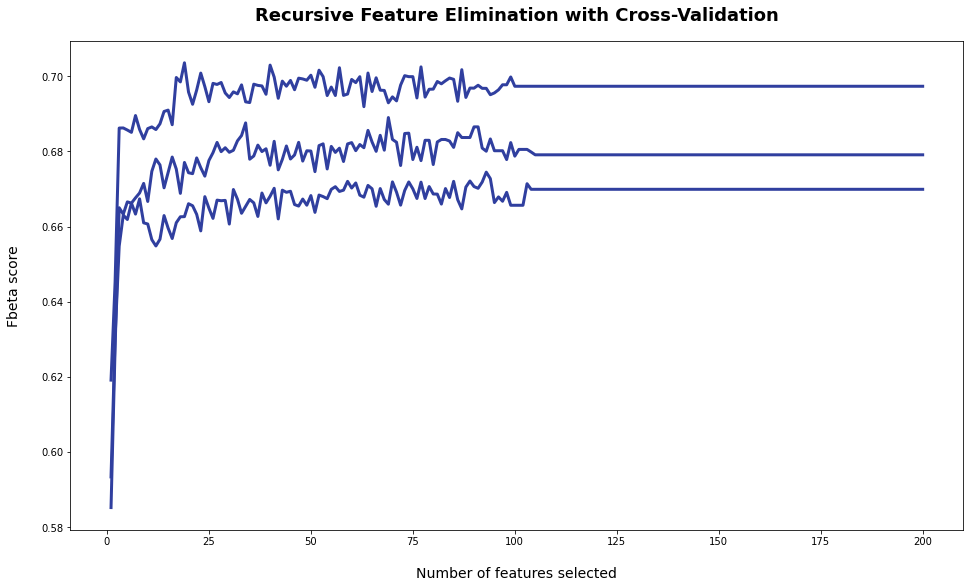

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Fbeta score', fontsize=14, labelpad=20)
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_, color='#303F9F', linewidth=3)

plt.show()


[ 13  14  16  23  24  25  27  28  34  36  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  53  54  55  56  57  58  63  64  65  66  67  68
  69  70  71  73  74  76  77  79  81  84  86  88  90  92  93  94  95  96
  97  98 101 103 105 106 107 108 109 110 111 113 114 116 117 118 119 120
 121 122 124 125 127 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 148 149 150 151 152 153 154 156 157 158 159 160 161
 162 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 184 185 186 187 188 189 192 194]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


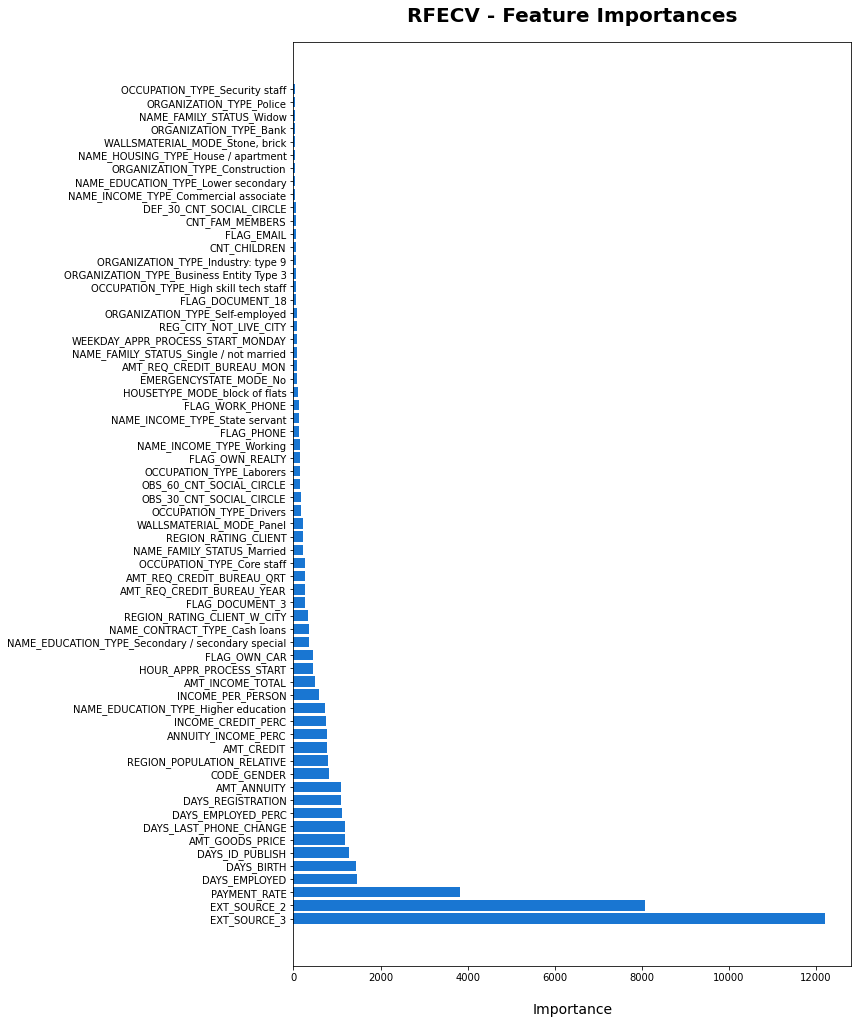

In [ ]:
print(np.where(selector.support_ == False)[0])

X_train.drop(X_train.columns[np.where(selector.support_ == False)[0]], axis=1, inplace=True)

dset = pd.DataFrame()
dset['Feature'] = X_train.columns
dset['Importance'] = selector.estimator_.feature_importances_

dset = dset.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 17))
plt.barh(y=dset['Feature'], width=dset['Importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
dset['Feature'][:30].values

array(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'PAYMENT_RATE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'ANNUITY_INCOME_PERC',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED_PERC', 'AMT_CREDIT', 'INCOME_PER_PERSON',
       'INCOME_CREDIT_PERC', 'REGION_POPULATION_RELATIVE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL',
       'NAME_CONTRACT_TYPE_Cash loans', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'WALLSMATERIAL_MODE_Panel', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Core staff',
       'NAME_EDUCATION_TYPE_Secondary / secondary special'], dtype=object)

In [ ]:
dset['Importance'][:30].sum()/dset['Importance'].sum()

0.9482284607325888

In [ ]:
X_train_red = X_train[dset['Feature'][:30].values]
X_test_red  = X_test[dset['Feature'][:30].values]

In [ ]:
import joblib
joblib.dump(GSmodel, '/content/drive/MyDrive/OC/P7/model.pkl')


['/content/drive/MyDrive/OC/P7/model.pkl']

In [ ]:
model = joblib.load(open('/content/drive/MyDrive/OC/P7/model.pkl', "rb"))
model.predict_proba([[0.17795342449659324,
  0.9235725832070916,
  0.11443021576983853,
  0.3400479342615841,
  0.86997543546226,
  0.5842293906810037,
  0.07256718044253853,
  0.1021324354657688,
  0.7745115143056523,
  0.10478270075139302,
  0.8871752118938446,
  1.0,
  0.1660835571250994,
  0.13078651685393258,
  0.001644373070746507,
  0.0009969632841515695,
  0.2569996399789526,
  1.0,
  0.0,
  0.0,
  0.7826086956521738,
  0.0009271334649016508,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0]])

array([[0.82305152, 0.17694848]])

Test mlflow pour export modèle

In [ ]:
!pip install mlflow

     |████████████████████████████████| 16.5 MB 211 kB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 596 kB 31.6 MB/s 
     |████████████████████████████████| 146 kB 31.1 MB/s 
     |████████████████████████████████| 210 kB 33.4 MB/s 
     |████████████████████████████████| 181 kB 28.6 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.16.4-py3-none-any.whl size=106877 sha256=559b3474df35ca51c82e687a44cf208446ad2538ea19a5baf3e3c0d1fde8965e
  Stored in directory: /root/.cache/pip/wheels/a2/a1/6d/fa1d22ea25ed8593887437fe1c7e00f6ef307fc240ccd4dc5c
Successfully built databricks-cli
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfu

In [ ]:
from mlflow.models.signature import infer_signature
import mlflow.sklearn

mlflow.sklearn.save_model(GSmodel, '/content/drive/MyDrive/OC/P7/mlflow_model')

In [ ]:
joblib.dump(lgbmc, '/content/drive/MyDrive/OC/P7/model.pkl')


['/content/drive/MyDrive/OC/P7/model.pkl']

In [ ]:
X_train_red.head()

,EXT_SOURCE_3,EXT_SOURCE_2,PAYMENT_RATE,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,AMT_ANNUITY,AMT_CREDIT,INCOME_CREDIT_PERC,REGION_POPULATION_RELATIVE,CODE_GENDER,NAME_EDUCATION_TYPE_Higher education,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE_Secondary / secondary special,INCOME_PER_PERSON,FLAG_OWN_CAR,HOUR_APPR_PROCESS_START,FLAG_DOCUMENT_3,OCCUPATION_TYPE_Core staff,NAME_CONTRACT_TYPE_Cash loans,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT_W_CITY,CNT_FAM_MEMBERS,NAME_FAMILY_STATUS_Married
136999,0.158335,0.166846,0.731791,0.713377,0.214049,0.496642,1.000000,0.102132,0.417813,0.328423,0.141576,0.173026,0.107056,0.002139,0.024260,1,1,0.001697,0,0.002798,1,0.695652,1,0,1,2.0,0.017241,1.0,0.052632,1
14529,0.576382,0.823094,0.421912,0.858084,0.643803,0.803777,0.594265,0.006734,0.351119,0.250601,0.019571,0.009877,0.005618,0.011075,0.491595,1,0,0.001119,1,0.001933,0,0.347826,1,0,1,4.0,0.000000,0.5,0.052632,0
118699,0.517935,0.189697,0.083353,0.761780,0.519858,0.687631,0.691756,0.270483,0.351119,0.363874,0.181391,0.154344,0.302292,0.000459,0.344429,1,0,0.001119,1,0.001933,0,0.260870,1,0,1,2.0,0.002874,0.5,0.052632,1
76315,0.507912,0.061274,0.675985,0.936244,0.626912,0.913643,0.856631,0.068462,0.317216,0.110239,0.110932,0.105608,0.067416,0.002603,0.107702,0,0,0.001312,1,0.002221,1,0.260870,0,0,1,5.0,0.005747,1.0,0.052632,1
159483,0.507912,0.554057,0.350419,0.927032,0.879308,0.802120,1.000000,0.214366,0.742115,0.183161,0.169946,0.235241,0.249079,0.001018,0.446855,1,1,0.001927,0,0.003145,0,0.608696,1,0,1,0.0,0.002874,0.0,0.052632,1


In [ ]:
selector.transform(X_train)

In [ ]:
y_train['TARGET'].value_counts()

0.0    6890
1.0    6890
Name: TARGET, dtype: int64

## Tensorflow

In [ ]:
!pip install tensorflow_addons


     |████████████████████████████████| 1.1 MB 12.1 MB/s 


In [ ]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
    



In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']])

X = pd.concat([X_train, y_train], axis=1)
class_count_0, class_count_1 = X['TARGET'].value_counts()
class_0 = X[X['TARGET'] == 0]
class_1 = X[X['TARGET'] == 1]

class_0_under = class_0.sample(class_count_1)
X = pd.concat([class_1, class_0_under], axis=0)
print('under_sampling :', X['TARGET'].value_counts()) 

X_train, y_train = X.loc[:, X.columns != 'TARGET'], X[['TARGET']]

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(200,activation = 'sigmoid'),  tf.keras.layers.Dense(10000,activation = 'relu'),
                               tf.keras.layers.Dense(10000,activation = 'sigmoid'),tf.keras.layers.Dense(10000,activation = 'sigmoid'),
                              tf.keras.layers.Dense(100,activation = 'sigmoid'),  tf.keras.layers.Dense(2,activation=tf.nn.softmax)])
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD() ,  metrics=['accuracy', f1_metric])

model_1.fit(X_train, np.array(y_train),batch_size=2048, epochs = 5, validation_split = 0.2)

under_sampling : 0.0    9183
1.0    9183
Name: TARGET, dtype: int64
Epoch 1/5
8/8 [==============================] - 377s 46s/step - loss: 0.7686 - accuracy: 0.4858 - f1_metric: 0.7645 - val_loss: 0.6931 - val_accuracy: 0.9967 - val_f1_metric: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 366s 46s/step - loss: 0.6931 - accuracy: 0.5071 - f1_metric: 0.7672 - val_loss: 0.6931 - val_accuracy: 0.4989 - val_f1_metric: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 366s 46s/step - loss: 0.6931 - accuracy: 0.5220 - f1_metric: 0.7733 - val_loss: 0.6931 - val_accuracy: 0.5261 - val_f1_metric: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 366s 46s/step - loss: 0.6931 - accuracy: 0.5194 - f1_metric: 0.7691 - val_loss: 0.6931 - val_accuracy: 0.5351 - val_f1_metric: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 361s 45s/step - loss: 0.6931 - accuracy: 0.5189 - f1_metric: 0.7673 - val_loss: 0.6931 - val_accuracy: 0.5052 - val_f1_metric: 0.0000e+

In [ ]:
model_1.evaluate(X_test,np.array(y_test))

1185/1185 [==============================] - 427s 360ms/step - loss: 0.6932 - accuracy: 0.5175 - f1_metric: 0.1495


[0.6931573152542114, 0.5175325274467468, 0.1494859904050827]

In [ ]:
!pip install flask_wtf

In [ ]:
!pip install WTForms==2.3.3



In [ ]:
!pip install toolbox

## Preparation données application

In [ ]:
numeric_cols = df_train.select_dtypes(include=['float64','int64']).columns
df_train[numeric_cols] = mms.inverse_transform(df_train[numeric_cols])
df_red_train = df_train[['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'PAYMENT_RATE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'ANNUITY_INCOME_PERC',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED_PERC', 'AMT_CREDIT', 'INCOME_PER_PERSON',
       'INCOME_CREDIT_PERC', 'REGION_POPULATION_RELATIVE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL',
       'NAME_CONTRACT_TYPE_Cash loans', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'WALLSMATERIAL_MODE_Panel', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Core staff',
       'NAME_EDUCATION_TYPE_Secondary / secondary special']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
df_red_train = df_train[['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'PAYMENT_RATE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'ANNUITY_INCOME_PERC',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED_PERC', 'AMT_CREDIT', 'INCOME_PER_PERSON',
       'INCOME_CREDIT_PERC', 'REGION_POPULATION_RELATIVE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL',
       'NAME_CONTRACT_TYPE_Cash loans', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'WALLSMATERIAL_MODE_Panel', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Core staff',
       'NAME_EDUCATION_TYPE_Secondary / secondary special']]

In [ ]:
df_red_train.to_csv('/content/drive/MyDrive/OC/P7/df_red_train.csv',index=False)

In [ ]:
df_train[numeric_cols] = mms.inverse_transform(df_train[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
df_train.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,...,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0.0,0,1,0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1,1,1,1,1,0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011814,0.500000,67500.0,0.100000,0.050000
1,0.0,0,0,0,0.0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941.0,-1588.0,-4970.0,-477.0,1,1,1,1,1,0,2.0,2.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.093737,0.201837,49500.0,0.277955,0.056101
2,0.0,1,1,0,1.0,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778.0,-3130.0,-1213.0,-619.0,1,1,0,1,1,0,3.0,2.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.227174,0.109564,57000.0,0.241526,0.026463
3,0.0,0,1,0,0.0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850.0,-449.0,-4597.0,-2379.0,1,1,1,1,0,0,2.0,3.0,3.0,16.0,0.0,0.0,0.0,0.0,1.0,1.0,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df_pred[numeric_cols] = mms.transform(df_pred[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
df_pred_display = df_pred[['SK_ID_CURR','EXT_SOURCE_3', 'EXT_SOURCE_2', 'PAYMENT_RATE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'ANNUITY_INCOME_PERC',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED_PERC', 'AMT_CREDIT', 'INCOME_PER_PERSON',
       'INCOME_CREDIT_PERC', 'REGION_POPULATION_RELATIVE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL',
       'NAME_CONTRACT_TYPE_Cash loans', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'WALLSMATERIAL_MODE_Panel', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Core staff',
       'NAME_EDUCATION_TYPE_Secondary / secondary special']]

In [ ]:
df_pred_display.to_csv('/content/drive/MyDrive/OC/P7/df_pred_display.csv')

In [ ]:
df_pred = df_pred[['SK_ID_CURR','EXT_SOURCE_3', 'EXT_SOURCE_2', 'PAYMENT_RATE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'ANNUITY_INCOME_PERC',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED_PERC', 'AMT_CREDIT', 'INCOME_PER_PERSON',
       'INCOME_CREDIT_PERC', 'REGION_POPULATION_RELATIVE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL',
       'NAME_CONTRACT_TYPE_Cash loans', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'WALLSMATERIAL_MODE_Panel', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Core staff',
       'NAME_EDUCATION_TYPE_Secondary / secondary special']]

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(df_pred)
df_red_pred = imputer.transform(df_pred)

In [ ]:
df_red_pred.shape

(48744, 31)

In [ ]:
df_red_pred = pd.DataFrame(df_red_pred, columns = ['SK_ID_CURR','EXT_SOURCE_3', 'EXT_SOURCE_2', 'PAYMENT_RATE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'ANNUITY_INCOME_PERC',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED_PERC', 'AMT_CREDIT', 'INCOME_PER_PERSON',
       'INCOME_CREDIT_PERC', 'REGION_POPULATION_RELATIVE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL',
       'NAME_CONTRACT_TYPE_Cash loans', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'WALLSMATERIAL_MODE_Panel', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Core staff',
       'NAME_EDUCATION_TYPE_Secondary / secondary special'])

In [ ]:
df_red_pred['SK_ID_CURR'] = df_red_pred['SK_ID_CURR'].astype(int)

In [ ]:
df_red_pred.head()

,SK_ID_CURR,EXT_SOURCE_3,EXT_SOURCE_2,PAYMENT_RATE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION,ANNUITY_INCOME_PERC,DAYS_ID_PUBLISH,NAME_EDUCATION_TYPE_Higher education,DAYS_EMPLOYED_PERC,AMT_CREDIT,INCOME_PER_PERSON,INCOME_CREDIT_PERC,REGION_POPULATION_RELATIVE,CODE_GENDER,FLAG_OWN_CAR,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_Cash loans,OBS_30_CNT_SOCIAL_CIRCLE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,WALLSMATERIAL_MODE_Panel,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Core staff,NAME_EDUCATION_TYPE_Secondary / secondary special
0,100001,0.159520,0.789654,0.036147,-19241.0,-2329.0,-1740.0,20560.5,450000.0,-5170.0,0.152300,-812.0,1.0,0.121044,568800.0,67500.0,0.237342,0.018850,1.0,0.0,0.0,18.0,135000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,100005,0.432962,0.291656,0.077973,-18064.0,-4469.0,0.0,17370.0,180000.0,-9118.0,0.175455,-1623.0,0.0,0.247398,222768.0,49500.0,0.444409,0.035792,0.0,0.0,3.0,9.0,99000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,100013,0.610991,0.699787,0.105202,-20038.0,-4458.0,-856.0,69777.0,630000.0,-2175.0,0.344578,-3503.0,1.0,0.222477,663264.0,101250.0,0.305308,0.019101,0.0,1.0,4.0,14.0,202500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028,0.612704,0.509677,0.031123,-13976.0,-1866.0,-1805.0,49018.5,1575000.0,-2000.0,0.155614,-4208.0,0.0,0.133515,1575000.0,78750.0,0.200000,0.026392,1.0,0.0,3.0,11.0,315000.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,100038,0.279395,0.425687,0.051266,-13040.0,-2191.0,-821.0,32067.0,625500.0,-4000.0,0.178150,-4262.0,0.0,0.168021,625500.0,60000.0,0.287770,0.010032,0.0,1.0,1.8,5.0,180000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_red_pred.to_csv('/content/drive/MyDrive/OC/P7/df_red_pred.csv')

## Interprétabilité locale


In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 20.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=bfdbd25ff84cbf705693090240f8e3ec285f236ae2bb93b2a51f5c6d43d6b404
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
np.array(X_test_red)

array([[0.52597177, 0.71364999, 0.07640897, ..., 1.        , 0.        ,
        0.        ],
       [0.38826059, 0.79474547, 0.07784527, ..., 1.        , 1.        ,
        1.        ],
       [0.90670081, 0.68835772, 0.72859639, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.72281996, 0.7417321 , 0.74391028, ..., 1.        , 0.        ,
        0.        ],
       [0.3846082 , 0.86756636, 0.07681534, ..., 1.        , 0.        ,
        0.        ],
       [0.3809722 , 0.86908258, 0.23611513, ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
from sklearn.neighbors import NearestNeighbors
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(np.array(X_test_red),feature_names= dset['Feature'][:30].values, mode="classification")


In [ ]:
idx = 0

print("Prediction : ", GSmodel.predict(np.array(X_test_red.iloc[idx]).reshape(-1,30)))
print("Actual :     ", y_test.iloc[idx])

explanation = explainer.explain_instance(np.array(X_test_red.iloc[idx]), GSmodel.predict_proba, num_features=len(X_test_red.columns))
explanation


Prediction :  [1.]
Actual :      TARGET    0.0
Name: 109037, dtype: category
Categories (2, float64): [0.0, 1.0]


In [ ]:
explanation.show_in_notebook()


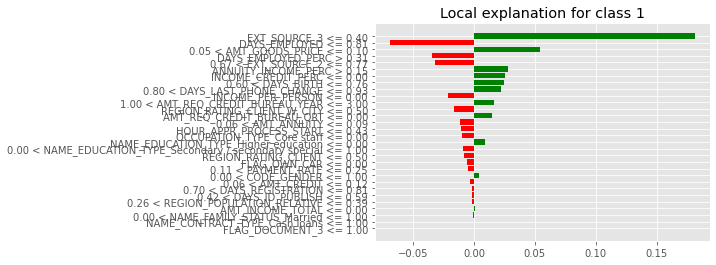

In [ ]:
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()


In [ ]:
X_test_red.iloc[0]

EXT_SOURCE_3                                         0.078939
EXT_SOURCE_2                                         0.672077
PAYMENT_RATE                                         0.242656
DAYS_EMPLOYED                                        0.759658
DAYS_BIRTH                                           0.671308
DAYS_ID_PUBLISH                                      0.427400
AMT_GOODS_PRICE                                      0.102132
DAYS_LAST_PHONE_CHANGE                               0.912545
DAYS_EMPLOYED_PERC                                   0.439631
DAYS_REGISTRATION                                    0.759072
AMT_ANNUITY                                          0.078261
CODE_GENDER                                          1.000000
REGION_POPULATION_RELATIVE                           0.392880
AMT_CREDIT                                           0.101124
ANNUITY_INCOME_PERC                                  0.336981
INCOME_CREDIT_PERC                                   0.000337
NAME_EDU